# Laptop Price Prediction

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [2]:
data = pd.read_csv('laptop_data.csv')

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Preprocessing

### Data Quality Assessment (DQA)

In [4]:
df = data.copy()
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.shape

(1303, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [10]:
print("Company = ", len(df["Company"].unique()))
print("TypeName = ", len(df["TypeName"].unique()))
print("Inches = ", len(df["Inches"].unique()))
print("ScreenResolution = ", len(df["ScreenResolution"].unique()))
print("Cpu = ", len(df["Cpu"].unique()))
print("Ram = ", len(df["Ram"].unique()))
print("Memory = ", len(df["Memory"].unique()))
print("Gpu = ", len(df["Gpu"].unique()))
print("OpSys = ", len(df["OpSys"].unique()))
print("Weight = ", len(df["Weight"].unique()))

Company =  19
TypeName =  6
Inches =  18
ScreenResolution =  40
Cpu =  118
Ram =  9
Memory =  39
Gpu =  110
OpSys =  9
Weight =  179


### Data Cleaning 

In [11]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [13]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [14]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


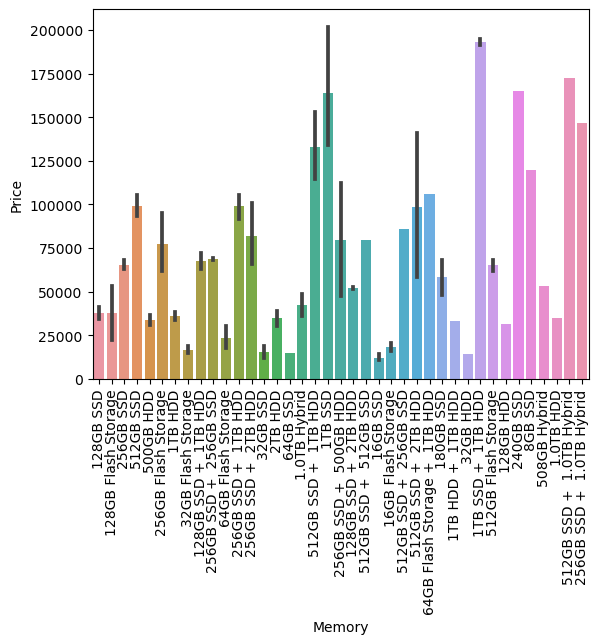

In [15]:
sns.barplot(x=df['Memory'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [16]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [17]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,0,0


In [18]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

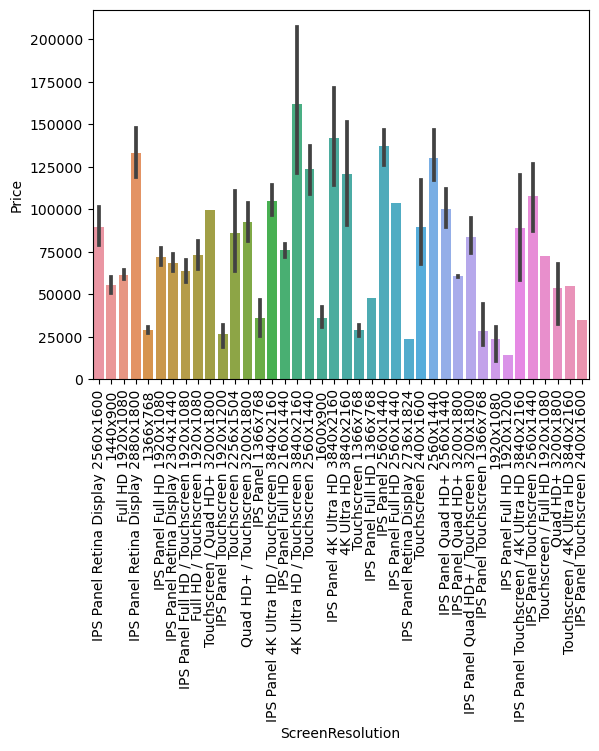

In [19]:
sns.barplot(x=df['ScreenResolution'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [20]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [21]:
df['new'] = df['ScreenResolution'].str.split().str[-1].str.split("x")
df['X_res'] = df["new"].str[0].astype(int)
df['Y_res'] = df["new"].str[1].astype(int)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,new,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,"[2560, 1600]",2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,"[1440, 900]",1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,"[1920, 1080]",1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,"[2880, 1800]",2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,"[2560, 1600]",2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,0,128,"[1920, 1080]",1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,0,512,"[3200, 1800]",3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,"[1366, 768]",1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,1000,0,"[1366, 768]",1366,768


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  HDD               1303 non-null   int64  
 12  SSD               1303 non-null   int64  
 13  new               1303 non-null   object 
 14  X_res             1303 non-null   int32  
 15  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64

In [23]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

In [24]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df['Ips'].value_counts()

0    938
1    365
Name: Ips, dtype: int64

In [25]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [26]:
df['ScreenResolution'] = (df['X_res']*df['Y_res']).astype('int')

In [27]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,new,X_res,Y_res,Touchscreen,Ips,ppi
0,Apple,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,"[2560, 1600]",2560,1600,0,1,226.983005
1,Apple,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,"[1440, 900]",1440,900,0,0,127.677940
2,HP,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,"[1920, 1080]",1920,1080,0,0,141.211998
3,Apple,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,"[2880, 1800]",2880,1800,0,1,220.534624
4,Apple,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,"[2560, 1600]",2560,1600,0,1,226.983005


In [28]:
df.drop(['new', 'X_res', 'Y_res'], inplace=True, axis=1)

In [29]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Touchscreen,Ips,ppi
0,Apple,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,1,226.983005
1,Apple,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,127.677940
2,HP,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,0,0,141.211998
3,Apple,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,0,1,220.534624
4,Apple,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,0,1,226.983005


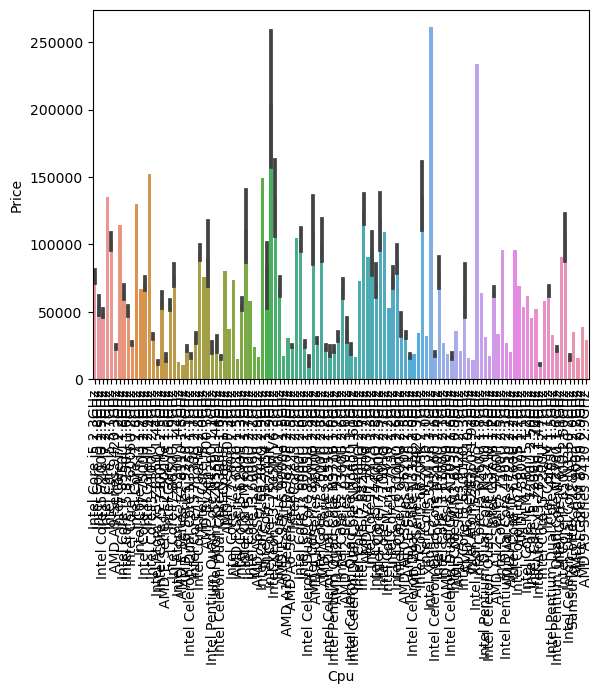

In [30]:
sns.barplot(x=df['Cpu'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [31]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [32]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [33]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,0,1,226.983005,Intel Core i5


In [34]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [35]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: >

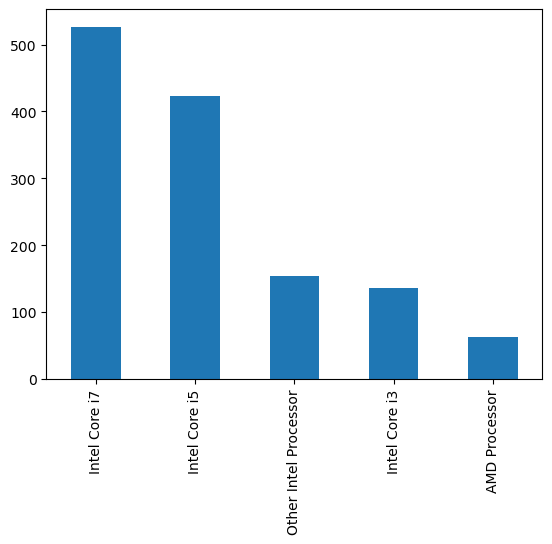

In [37]:
df['Cpu brand'].value_counts().plot(kind='bar')

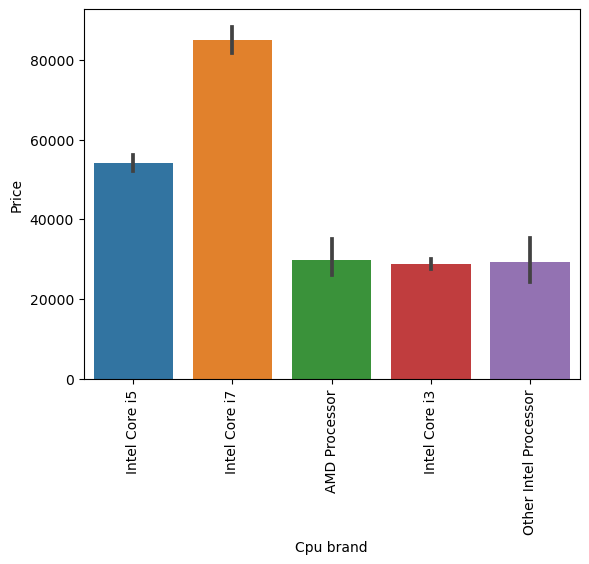

In [38]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

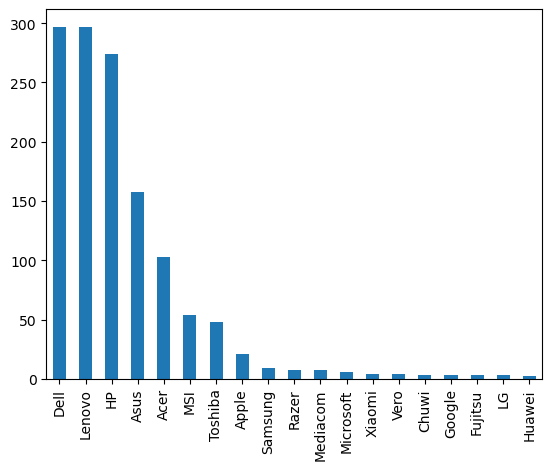

In [39]:
df['Company'].value_counts().plot(kind='bar')

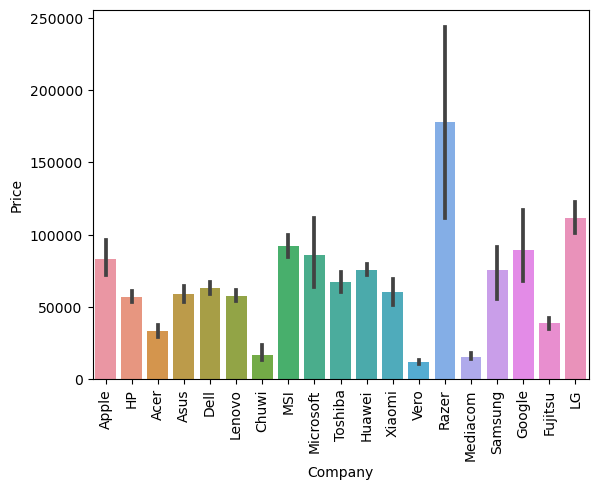

In [40]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

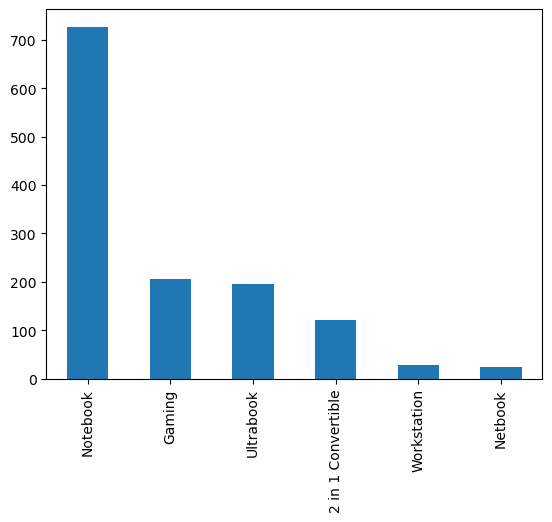

In [41]:
df['TypeName'].value_counts().plot(kind='bar')

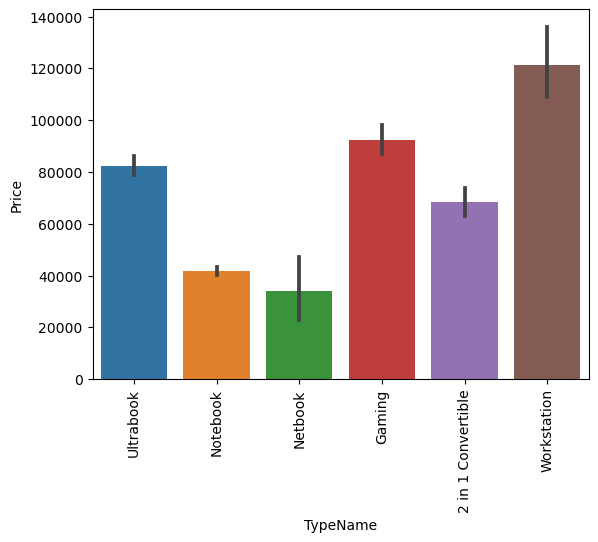

In [42]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

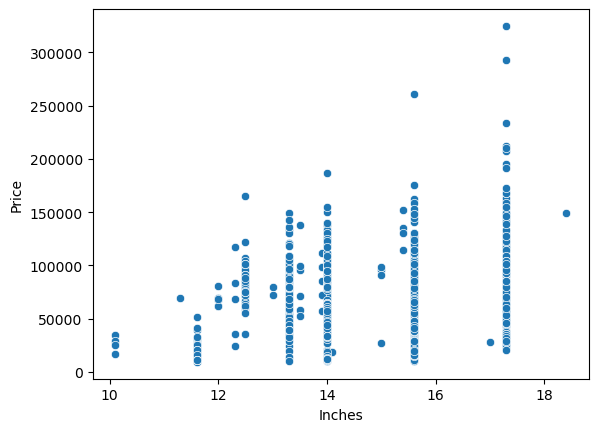

In [43]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [44]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
851,Asus,Gaming,15.6,2073600,Intel Core i7 7700HQ 2.8GHz,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.10,101178.7200,1000,128,0,0,141.211998,Intel Core i7,Intel Core i7
1225,Asus,Notebook,15.6,1049088,Intel Pentium Quad Core N3710 1.6GHz,4,1000 HDD,Intel HD Graphics 405,Windows 10,2.65,16463.5200,1000,0,0,0,100.454670,Intel Pentium Quad,Other Intel Processor
51,Acer,Notebook,15.6,2073600,Intel Core i7 8550U 1.8GHz,8,256 SSD,Nvidia GeForce MX150,Windows 10,2.20,44808.4800,0,256,0,1,141.211998,Intel Core i7,Intel Core i7
1003,HP,Notebook,14.0,1049088,Intel Core i5 7200U 2.5GHz,4,500 HDD,Intel HD Graphics 620,Windows 10,1.64,41505.1200,500,0,0,0,111.935204,Intel Core i5,Intel Core i5
1227,Dell,Notebook,15.6,1049088,Intel Core i5 7200U 2.5GHz,4,1000 HDD,Intel HD Graphics 520,Linux,2.18,27804.7008,1000,0,0,0,100.454670,Intel Core i5,Intel Core i5


<Axes: >

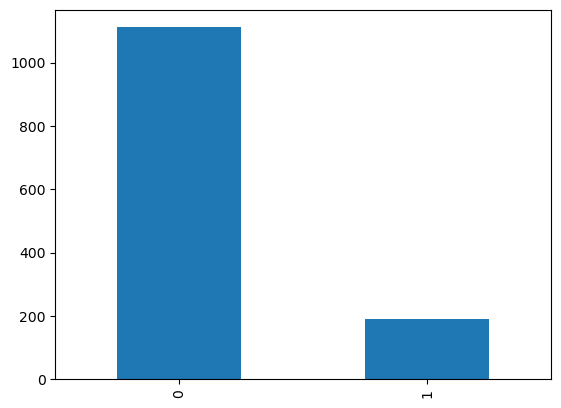

In [45]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

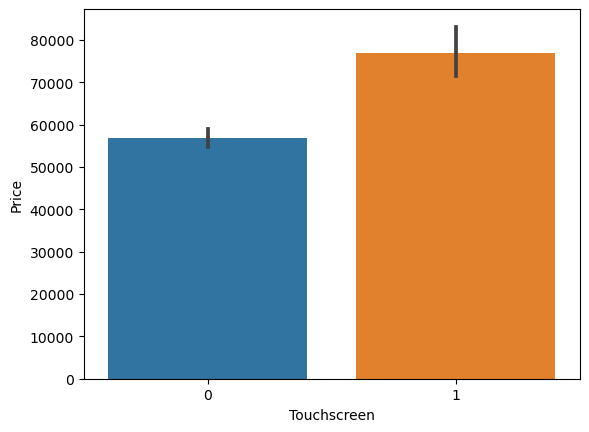

In [46]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [47]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,127.677940,Intel Core i5,Intel Core i5


<Axes: >

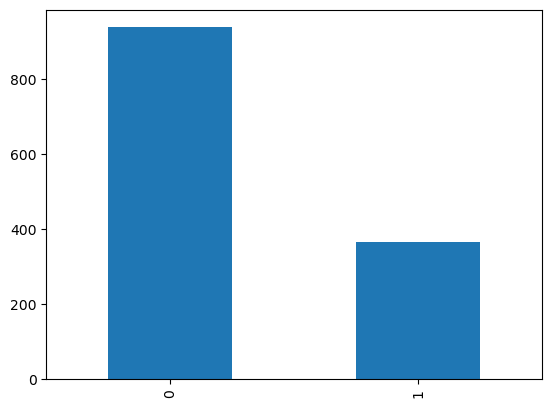

In [48]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

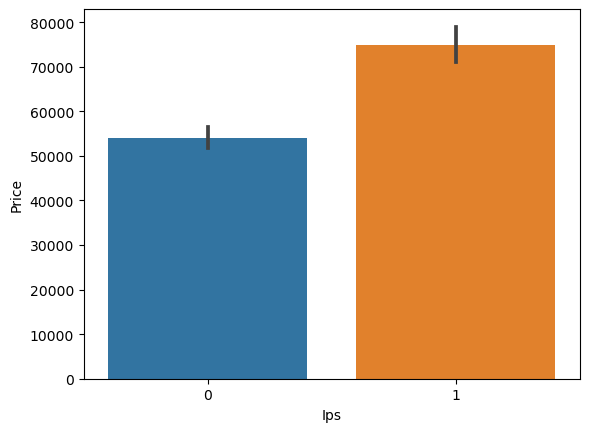

In [49]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [50]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
144,HP,Notebook,15.6,1049088,AMD A6-Series 9220 2.5GHz,4,256 SSD,AMD Radeon R4 Graphics,Windows 10,1.86,19660.32,0,256,0,0,100.454670,AMD A6-Series 9220,AMD Processor
492,Asus,Gaming,15.6,2073600,Intel Core i7 7700HQ 2.8GHz,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,71928.00,1000,128,0,0,141.211998,Intel Core i7,Intel Core i7
312,MSI,Gaming,15.6,2073600,Intel Core i7 7700HQ 2.8GHz,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.80,111834.72,1000,256,0,1,141.211998,Intel Core i7,Intel Core i7
727,Dell,2 in 1 Convertible,13.3,2073600,Intel Core i3 7100U 2.4GHz,4,1000 HDD,Intel HD Graphics 620,Windows 10,1.71,34578.72,1000,0,1,0,165.632118,Intel Core i3,Intel Core i3
767,Dell,Gaming,15.6,8294400,Intel Core i7 6700HQ 2.6GHz,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.72,58554.72,1000,128,1,1,282.423996,Intel Core i7,Intel Core i7


In [51]:
df.corr()['Price']

Inches              0.068197
ScreenResolution    0.515486
Ram                 0.743007
Weight              0.210370
Price               1.000000
HDD                -0.096441
SSD                 0.670799
Touchscreen         0.191226
Ips                 0.252208
ppi                 0.473487
Name: Price, dtype: float64

In [52]:
df.drop(columns=['Cpu','Cpu Name', 'Inches'],inplace=True)

In [53]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,4096000,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1296000,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,2073600,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,5184000,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,4096000,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,0,1,226.983005,Intel Core i5


<Axes: >

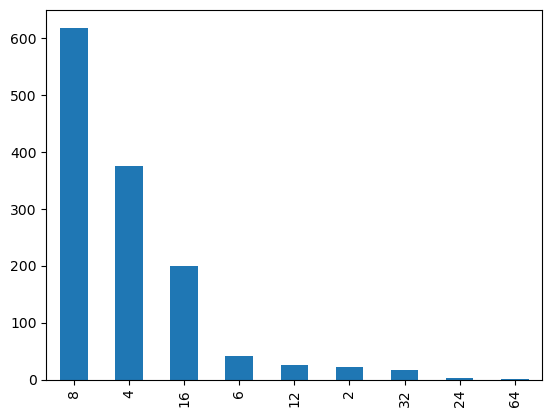

In [54]:
df['Ram'].value_counts().plot(kind='bar')

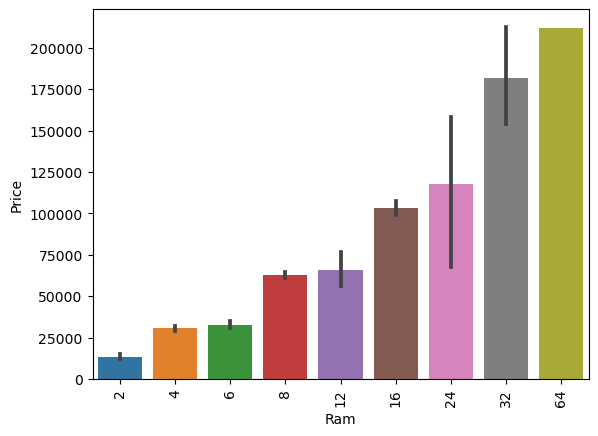

In [55]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df.corr()['Price']

ScreenResolution    0.515486
Ram                 0.743007
Weight              0.210370
Price               1.000000
HDD                -0.096441
SSD                 0.670799
Touchscreen         0.191226
Ips                 0.252208
ppi                 0.473487
Name: Price, dtype: float64

In [57]:
df.head(5)

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,4096000,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1296000,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,2073600,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,5184000,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,4096000,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,0,1,226.983005,Intel Core i5


In [58]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [59]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [60]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Touchscreen,Ips,ppi,Cpu brand,Gpu brand
0,Apple,Ultrabook,4096000,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,1296000,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,2073600,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,5184000,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,4096000,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,0,1,226.983005,Intel Core i5,Intel


In [61]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [62]:
df = df[df['Gpu brand'] != 'ARM']

In [63]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

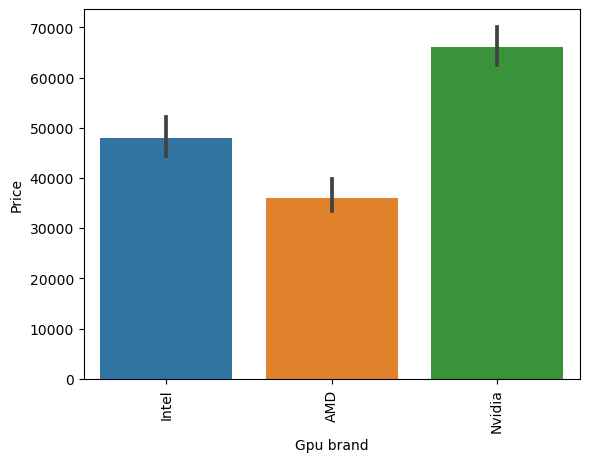

In [64]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
df.drop(columns=['Gpu'],inplace=True)

In [66]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,OpSys,Weight,Price,HDD,SSD,Touchscreen,Ips,ppi,Cpu brand,Gpu brand
0,Apple,Ultrabook,4096000,8,128 SSD,macOS,1.37,71378.6832,0,128,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,1296000,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,2073600,8,256 SSD,No OS,1.86,30636.0000,0,256,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,5184000,16,512 SSD,macOS,1.83,135195.3360,0,512,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,4096000,8,256 SSD,macOS,1.37,96095.8080,0,256,0,1,226.983005,Intel Core i5,Intel


In [67]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

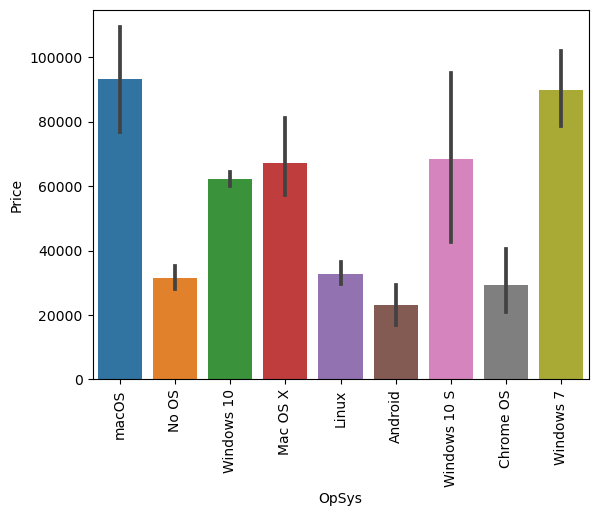

In [68]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [70]:
df['os'] = df['OpSys'].apply(cat_os)

In [71]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,OpSys,Weight,Price,HDD,SSD,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,4096000,8,128 SSD,macOS,1.37,71378.6832,0,128,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,1296000,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,2073600,8,256 SSD,No OS,1.86,30636.0000,0,256,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,5184000,16,512 SSD,macOS,1.83,135195.3360,0,512,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,4096000,8,256 SSD,macOS,1.37,96095.8080,0,256,0,1,226.983005,Intel Core i5,Intel,Mac


In [72]:
df.drop(columns=['OpSys'],inplace=True)

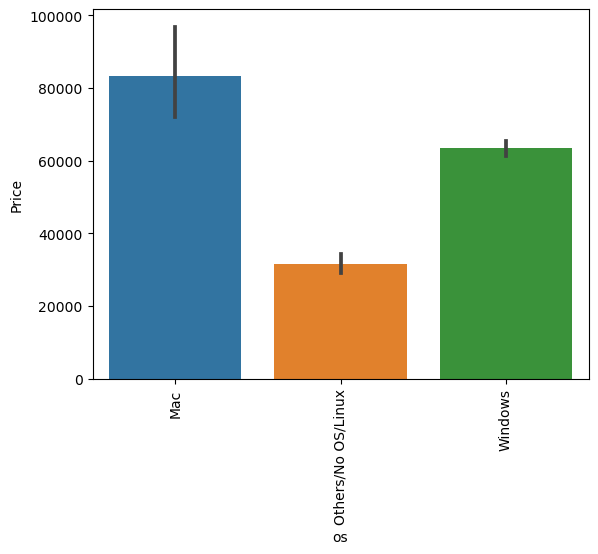

In [73]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

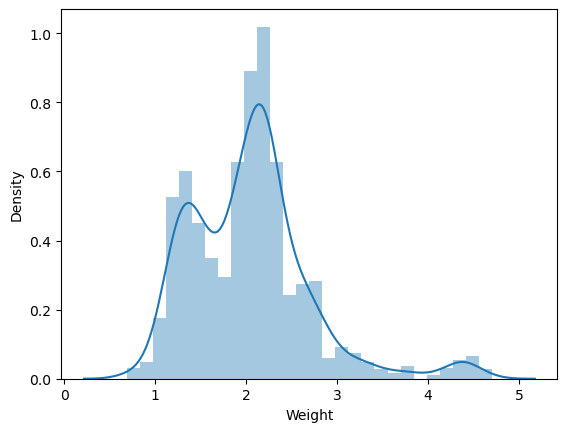

In [74]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

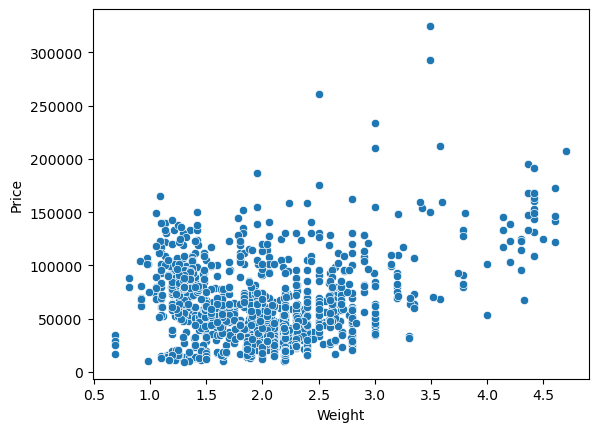

In [75]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [76]:
df.corr()['Price']

ScreenResolution    0.516474
Ram                 0.742905
Weight              0.209867
Price               1.000000
HDD                -0.096891
SSD                 0.670660
Touchscreen         0.192917
Ips                 0.253320
ppi                 0.475368
Name: Price, dtype: float64

<Axes: >

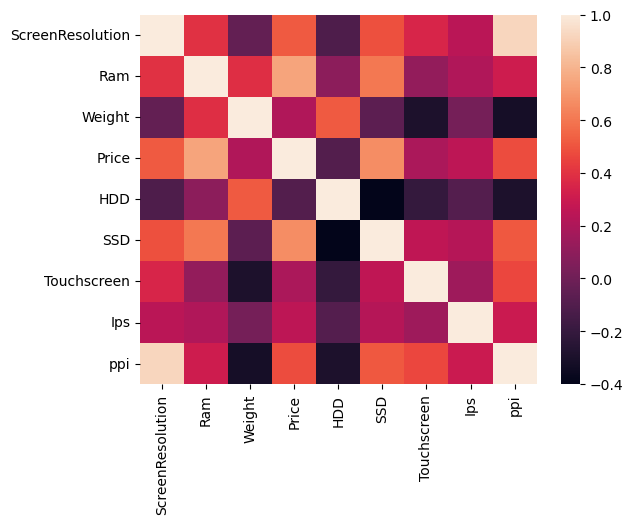

In [77]:
sns.heatmap(df.corr())

### Identifying And Removing Outliers 

In [78]:
df.describe()

,ScreenResolution,Ram,Weight,Price,HDD,SSD,Touchscreen,Ips,ppi
count,1.302000e+03,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000
mean,2.167523e+06,8.385561,2.039416,59889.058673,414.101382,183.874040,0.146697,0.27957,146.568497
std,1.391055e+06,5.085166,0.665274,37251.183866,515.889348,186.969314,0.353940,0.44896,43.069016
min,1.049088e+06,2.000000,0.690000,9270.720000,0.000000,0.000000,0.000000,0.00000,90.583402
25%,1.440000e+06,4.000000,1.500000,31914.720000,0.000000,0.000000,0.000000,0.00000,127.335675
50%,2.073600e+06,8.000000,2.040000,52107.840000,0.000000,256.000000,0.000000,0.00000,141.211998
75%,2.073600e+06,8.000000,2.300000,79303.816800,1000.000000,256.000000,0.000000,1.00000,157.350512
max,8.294400e+06,64.000000,4.700000,324954.720000,2000.000000,1024.000000,1.000000,1.00000,352.465147


<Axes: title={'center': 'Price'}>

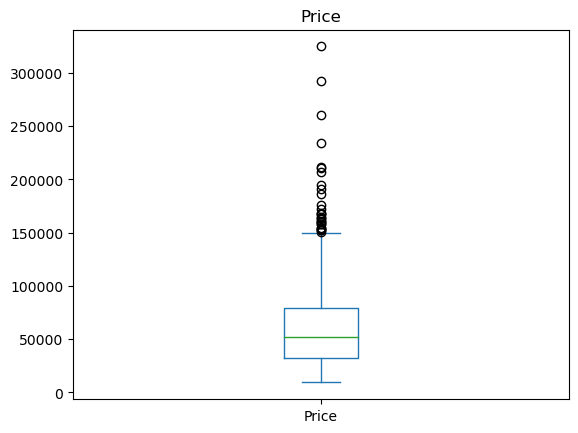

In [79]:
# Box plot
df['Price'].plot(kind='box', title='Price')

In [80]:
len(df[df['Price']>1.5e5])

29

<Axes: title={'center': 'Price'}>

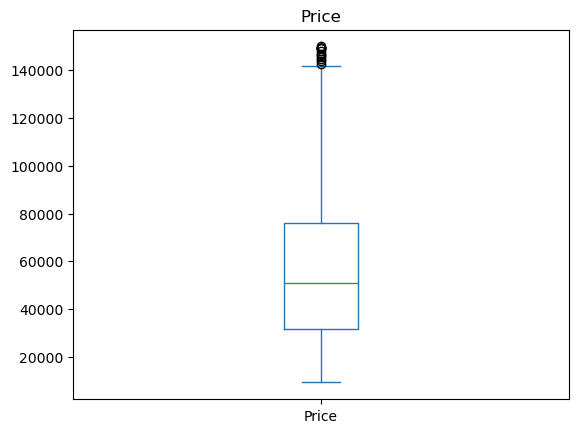

In [81]:
df = df[df['Price']<1.5e5].reset_index(drop=True)
df["Price"].plot(kind='box', title="Price")

### Data Tranformation (Encoding Categorical Variables)

In [82]:
df.columns

Index(['Company', 'TypeName', 'ScreenResolution', 'Ram', 'Memory', 'Weight',
       'Price', 'HDD', 'SSD', 'Touchscreen', 'Ips', 'ppi', 'Cpu brand',
       'Gpu brand', 'os'],
      dtype='object')

In [83]:
X = df.loc[:,['Company', 'TypeName', 'ScreenResolution', 'Ram',
              'Memory', 'Weight', 'HDD', 'SSD', 'Touchscreen', 
              'Ips', 'ppi', 'Cpu brand', 'Gpu brand', 'os']]
y = df.loc[:,['Price']]

In [84]:
df.dtypes

Company              object
TypeName             object
ScreenResolution      int32
Ram                   int32
Memory               object
Weight              float32
Price               float64
HDD                   int64
SSD                   int64
Touchscreen           int64
Ips                   int64
ppi                 float64
Cpu brand            object
Gpu brand            object
os                   object
dtype: object

In [85]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()     # To convert categorical data into an integer
ohe.fit(X[['Company', 'TypeName', 'Memory', 'Cpu brand', 'Gpu brand', 'os']])

OneHotEncoder()

In [86]:
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                      ['Company', 'TypeName', 'Memory', 'Cpu brand', 'Gpu brand', 'os']),
                                      remainder='passthrough')

### Model Selection

### 1. Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [88]:
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
                                                                            array(['2 in 1 Convertible', 'Gaming', '...
       '64 Flash Storage +  1000 HDD', '64 SSD', '8 SSD'], dtype=object),
                                                                            array(['AMD Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
       'Other Intel Processor'], dtype=object),
                                                                            array(['AMD', 'Intel', 'Nvidia'], dtype=object),
                                                                            array(['Mac', 'Others/No OS/Linux', 'Windows'], dtype=object)]),
                                                  ['Company', 'TypeName',
                                                   'Memory', 'Cpu brand',
                                                   'Gpu brand', 'os'])])),
                ('linearregression', LinearRegression())])

In [89]:
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.6267915803336588

In [90]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=i)
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2_score(y_test, y_pred)
    scores.append(r2_score(y_test, y_pred))

In [91]:
print(np.argmax(scores))
print(scores[np.argmax(scores)])

109
0.7292148993624953


### 2. Decision Tree

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
dt = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=np.argmax(scores))
pipe = make_pipeline(column_trans, dt)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.779012520270066

### 3. Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rf = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=np.argmax(scores))
pipe = make_pipeline(column_trans, rf)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.8853968233957942

### 4. KNN

In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
knn = KNeighborsRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=np.argmax(scores))
pipe = make_pipeline(column_trans, knn)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.7865638717870326

### 5. SVM

In [98]:
from sklearn.svm import SVR

In [99]:
svr= SVR()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=np.argmax(scores))
pipe = make_pipeline(column_trans, svr)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

-0.028877489063802164

### 6. AdaBoost

In [100]:
from sklearn.ensemble import AdaBoostRegressor

In [101]:
adb = AdaBoostRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=np.argmax(scores))
pipe = make_pipeline(column_trans, adb)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)


0.7396376765719397